In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from IPython.core.display_functions import display
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor  # or GradientBoostingClassifier, based on your problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import rankdata
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm

from sklearn.metrics import r2_score

In [92]:
df = pd.read_csv("diamonds.csv")

In [93]:
print(df.columns)

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')


In [94]:
columns_to_keep = ["total_sales_price", "carat_weight"]
df = df.loc[:, columns_to_keep]

In [95]:
display(df)

,total_sales_price,carat_weight
0,200,0.09
1,200,0.09
2,200,0.09
3,200,0.09
4,200,0.09
...,...,...
219698,1210692,10.65
219699,1292500,5.17
219700,1315496,18.07
219701,1350000,0.90


In [96]:
df['squared_carat_weight'] = df['carat_weight']**2
df['cubed_carat_weight'] = df['carat_weight']**3

display(df)

,total_sales_price,carat_weight,squared_carat_weight,cubed_carat_weight
0,200,0.09,0.0081,0.000729
1,200,0.09,0.0081,0.000729
2,200,0.09,0.0081,0.000729
3,200,0.09,0.0081,0.000729
4,200,0.09,0.0081,0.000729
...,...,...,...,...
219698,1210692,10.65,113.4225,1207.949625
219699,1292500,5.17,26.7289,138.188413
219700,1315496,18.07,326.5249,5900.304943
219701,1350000,0.90,0.8100,0.729000


                            OLS Regression Results                            
Dep. Variable:      total_sales_price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                 1.325e+05
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:48:03   Log-Likelihood:            -2.4314e+06
No. Observations:              219703   AIC:                         4.863e+06
Df Residuals:                  219699   BIC:                         4.863e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  249.5734 

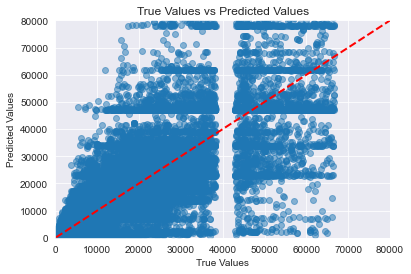

In [97]:
X = df.drop('total_sales_price', axis=1)
y = df['total_sales_price']

# Adding a constant to the independent variables (X)
X = sm.add_constant(X)

# Implementing OLS
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Printing the summary of the OLS model
print(model.summary())

# Evaluating the model
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

plt.scatter(y, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

# Set x and y-axis limits
plt.xlim(0, 80000)
plt.ylim(0, 80000)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()
